In [24]:
import cv2
import matplotlib.pyplot as plt

In [25]:
image_cv2_yunet = cv2.imread("../Seizure_videos/person.jpg")
height, width, _ = image_cv2_yunet.shape
image_cv2_yunet = cv2.cvtColor(image_cv2_yunet, cv2.COLOR_BGR2RGB)


model1 = "face_detection_yunet_2023mar.onnx"
model2 = "yunet_n_360_360.onnx"
model3 = "yunet_n_640_640.onnx"
model4 = "yunet_n_dynamic.onnx"

yunet = f"./Models/{model3}"
detector = cv2.FaceDetectorYN.create(yunet, "", (0, 0))
detector.setInputSize((width, height))

In [26]:
_, faces = detector.detect(image_cv2_yunet)

(-0.5, 539.5, 359.5, -0.5)

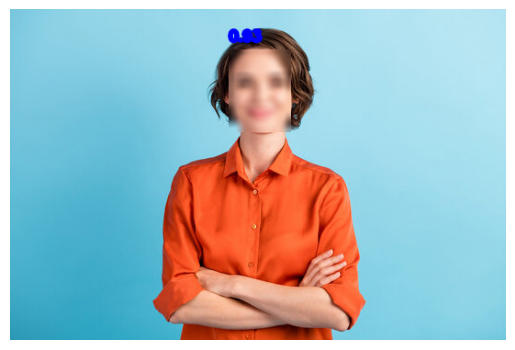

In [32]:
image_cv2_yunet = cv2.imread("../Seizure_videos/person.jpg")
image_cv2_yunet = cv2.cvtColor(image_cv2_yunet, cv2.COLOR_BGR2RGB)


if faces is not None: 
   for face in faces:     
      # bouding box
      box = list(map(int, face[:4]))

      roi = image_cv2_yunet[int(face[1]):(int(face[1])+int(face[3])), int(face[0]):(int(face[0])+int(face[2]))]

      color = (0, 0, 255)
      
      blurred_face = cv2.GaussianBlur(roi, (11,11), 5)

      image_cv2_yunet[int(face[1]):(int(face[1])+int(face[3])), int(face[0]):(int(face[0])+int(face[2]))] = blurred_face
      
      # confidence
      confidence = face[-1]
      confidence = "{:.2f}".format(confidence)
      position = (box[0], box[1] - 10)
      cv2.putText(image_cv2_yunet, confidence, position, cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 3, cv2.LINE_AA)


plt.figure()
plt.imshow(image_cv2_yunet)
plt.axis('off')

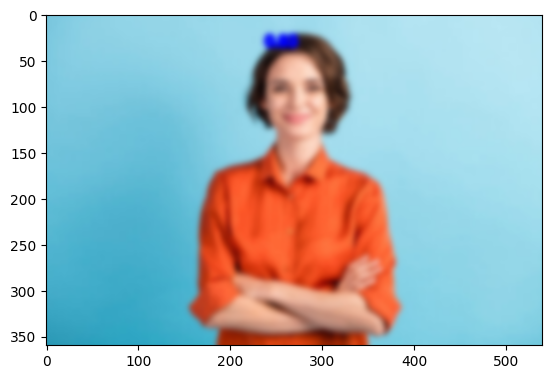

In [19]:
segment = image_cv2_yunet[int(face[1]):(int(face[1])+int(face[3])), int(face[0]):(int(face[0])+int(face[2]))]
image_cv2_yunet = cv2.GaussianBlur(image_cv2_yunet, (3, 3), 3)
plt.figure()
plt.imshow(image_cv2_yunet)